# Denoiser comparaison

Algorithm based on **energy minimization** generally perform a denoising precprocessing step to *attenuate* the noise level and have a better representation of the signl. In this notebook We will present two denoiser for **piecewise constant** signals. The denoising task will serve a classifier for the  **line process** $l$ representing the existence ($l=1$) or absence($l=0$) of a discontinuity.

We will present two classifiers :
* **Gnc denoiser** based on a quadratic relaxation of the **Blake and Zisserman** energy.
* **Condata** denoiser, a fast linear denoiser using the **taux string** methods

Simple results show that **condat denoiser** is well suited for attenuating noise from piecewise constant signal, the denoiser is way faster and have **100%** precision. But we will try to confirm that with stressing results.

In [14]:
#general prepration
import numpy as np
import matplotlib.pyplot as plt
from subprocess import check_output
from signalFactory import SignalFactory
%matplotlib inline

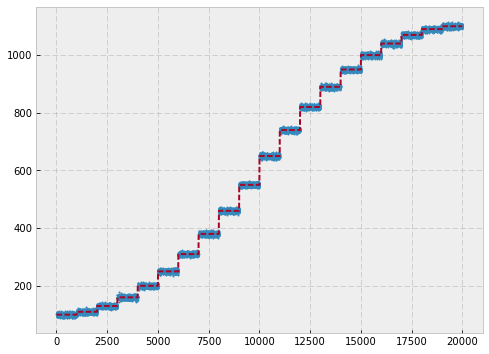

In [86]:
#trying a simple case
n=20000;
sigma=20
plt.figure(figsize=(8,6))
factory=SignalFactory(n,sigma)
ini,noised=factory.
plt.plot(noised,'.',ms=2)
plt.plot(ini,'--')

In [87]:
#function to recover with each denoiser
def conda_denoise(sig,lam=10):
    command=['/usr/local/bin/condat_denoiser','-i','signal','-o','denoised','l',str(lam)]
    np.savetxt('signal',sig,header='%d'%len(sig),comments="")
    time=check_output(command)
    denoised=np.loadtxt('denoised',skiprows=1)
    return (time,denoised)

In [88]:
def line_process_precision(sig,ground_truth):
    """
    function to to compute the precision the denoiser by the formula
    
    precision= card( lp=0 by denoiser)/card(lp=0 by ground truth)
    """
    lp_denoiser=sig[1:]-sig[0:-1];
    lp_ground=ground_truth[1:]-ground_truth[0:-1]
    precision=np.sum(lp_denoiser==0)/np.sum(lp_ground==0)
    remaining=np.where(lp_denoiser!=0)
    return (precision,remaining)

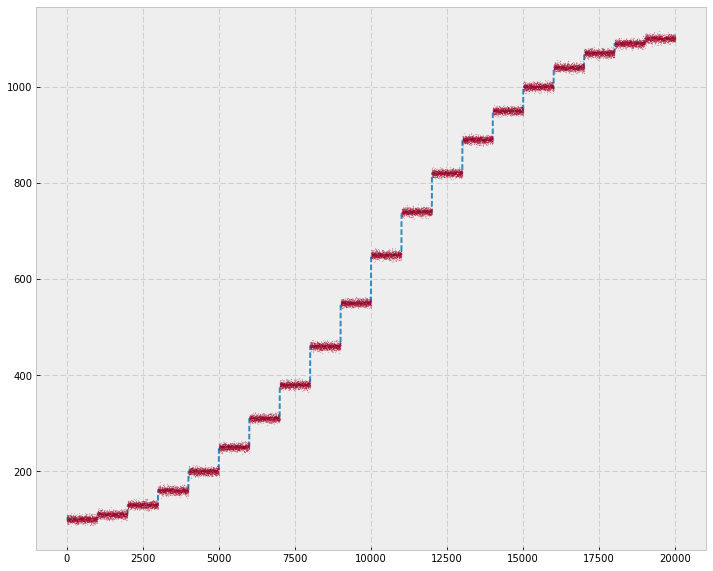

In [93]:
plt.figure(figsize=(12,10))
t1,denoised=conda_denoise(noised)
plt.plot(denoised,'--')
plt.plot(noised,'.',ms=0.2)



precision= 0.968969


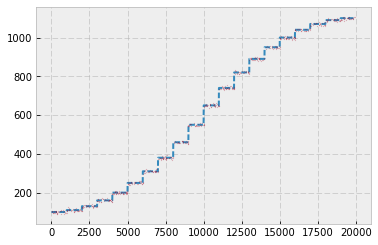

In [94]:
#precision
prec,rem=line_process_precision(denoised,ini)
print("precision= %4f"%prec)
X=np.arange(len(denoised))
plt.plot(X,ini,'--')
plt.plot(X[rem],noised[rem],'.',ms=0.2)

In [96]:
def gnc_denoise(sig,lam=10):
    command=['/usr/local/bin/gnc_denoiser','-i','signal','-o','denoised','l',str(lam),'-H','8']
    np.savetxt('signal',sig,header='%d'%len(sig),comments="")
    time=check_output(command)
    denoised=np.loadtxt('denoised',skiprows=1)
    return (time,denoised)

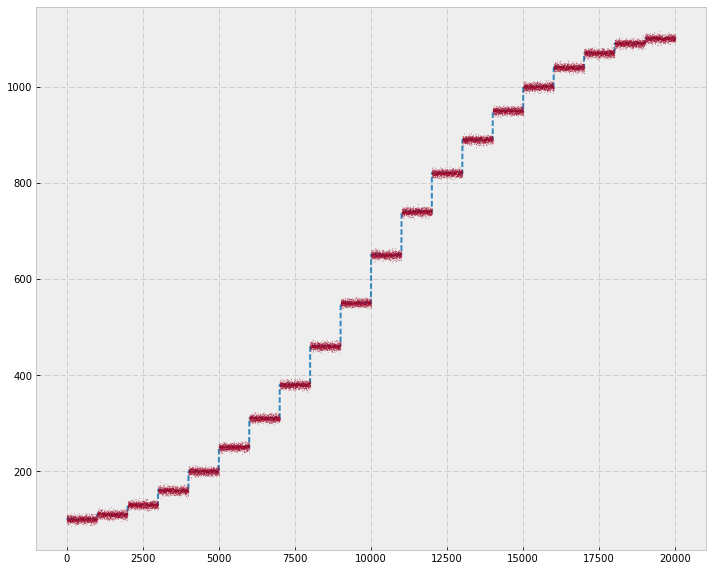

In [97]:
plt.figure(figsize=(12,10))
t1,denoised=gnc_denoise(noised)
plt.plot(denoised,'--')
plt.plot(noised,'.',ms=0.2)

In [101]:
def line_process_precision(sig,ground_truth,sensitivity):
    """
    compute the precision given a sensitivity
    """
    lp_denoiser=sig[1:]-sig[0:-1];
    lp_ground=ground_truth[1:]-ground_truth[0:-1]
    precision=np.sum(lp_denoiser<sensitivity)/np.sum(lp_ground==0)
    remaining=np.where(lp_denoiser>=sensitivity)
    return (precision,remaining)

precision= 1.000100


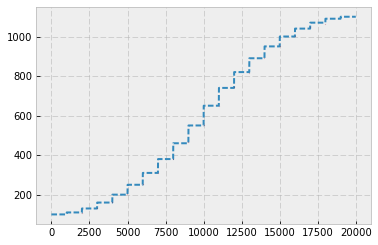

In [102]:
prec,rem=line_process_precision(denoised,ini,10)
print("precision= %4f"%prec)
X=np.arange(len(denoised))
plt.plot(X,ini,'--')
plt.plot(X[rem],noised[rem],'.',ms=0.2)